# A/B Testing Marketing Promotions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Marketing-Campaign.csv')
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [2]:
print ('Rows     : ' , df.shape[0])
print ('Columns  : ' , df.shape[1])
print ('\nFeatures : \n', df.columns.tolist())
print ('\nMissing values :  ', df.isnull().sum().values.sum())
print ('\nUnique values :  \n', df.nunique())

Rows     :  548
Columns  :  7

Features : 
 ['MarketID', 'MarketSize', 'LocationID', 'AgeOfStore', 'Promotion', 'week', 'SalesInThousands']

Missing values :   0

Unique values :  
 MarketID             10
MarketSize            3
LocationID          137
AgeOfStore           25
Promotion             3
week                  4
SalesInThousands    517
dtype: int64


In [3]:
df.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


## EDA and Visualizations

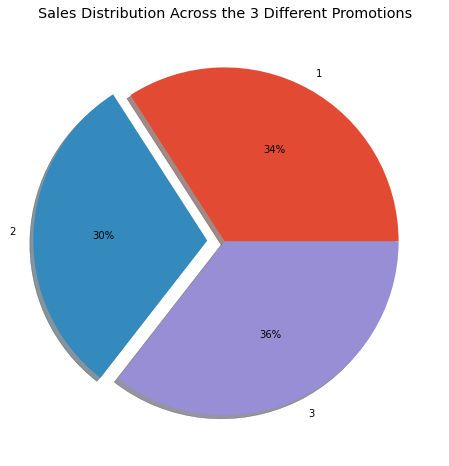

In [4]:
# Create some plots to visual our sales and marketing data
# Using ggplot's style
plt.style.use('ggplot')
ax = df.groupby('Promotion').sum()['SalesInThousands'].plot.pie(figsize=(8,8),
                                                               autopct='%1.0f%%',
                                                               shadow=True,
                                                               explode=(0,0.1,0))
ax.set_ylabel('')
ax.set_title('Sales Distribution Across the 3 Different Promotions')
plt.show()

In [5]:
# Now let's view the promotions for each market size
df.groupby(['Promotion','MarketSize']).count()['MarketID']

Promotion  MarketSize
1          Large          56
           Medium         96
           Small          20
2          Large          64
           Medium        108
           Small          16
3          Large          48
           Medium        116
           Small          24
Name: MarketID, dtype: int64

In [6]:
# Using unstack
df.groupby(['Promotion','MarketSize']).count()['MarketID'].unstack('MarketSize')

MarketSize,Large,Medium,Small
Promotion,,,
1,56,96,20
2,64,108,16
3,48,116,24


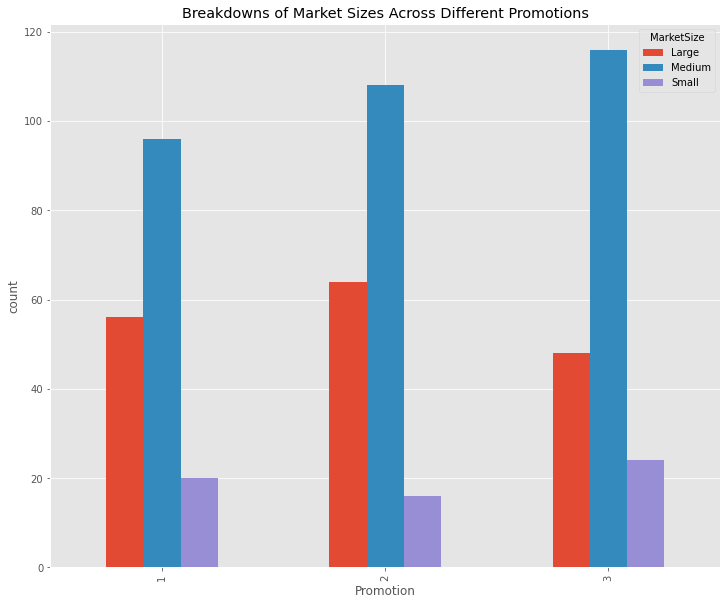

In [7]:
# Put this into a plot
ax = df.groupby(['Promotion','MarketSize']).count()['MarketID'].unstack('MarketSize').plot(
     kind='bar',
     figsize=(12,10),
     grid=True)
ax.set_ylabel('count')
ax.set_title('Breakdowns of Market Sizes Across Different Promotions')
plt.show()

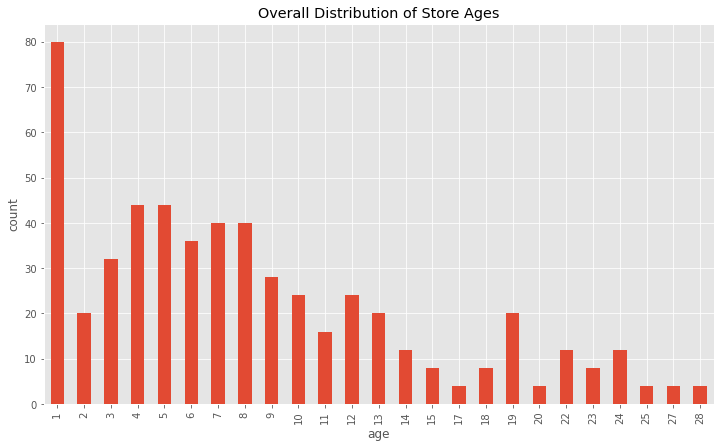

In [8]:
ax = df.groupby('AgeOfStore').count()['MarketID'].plot(
     kind='bar',
     figsize=(12,7),
     grid=True)
ax.set_xlabel('age')
ax.set_ylabel('count')
ax.set_title('Overall Distribution of Store Ages')
plt.show()

In [9]:
df.groupby(['AgeOfStore','Promotion']).count()['MarketID']

AgeOfStore  Promotion
1           1            24
            2            36
            3            20
2           1             8
            2             8
            3             4
3           1            16
            2            12
            3             4
4           1            16
            2            12
            3            16
5           1             8
            2            12
            3            24
6           1            20
            2             4
            3            12
7           1             4
            2            24
            3            12
8           1            12
            2             8
            3            20
9           1             8
            2            12
            3             8
10          2            16
            3             8
11          1             4
            3            12
12          1            12
            2             4
            3             8
13          1            1

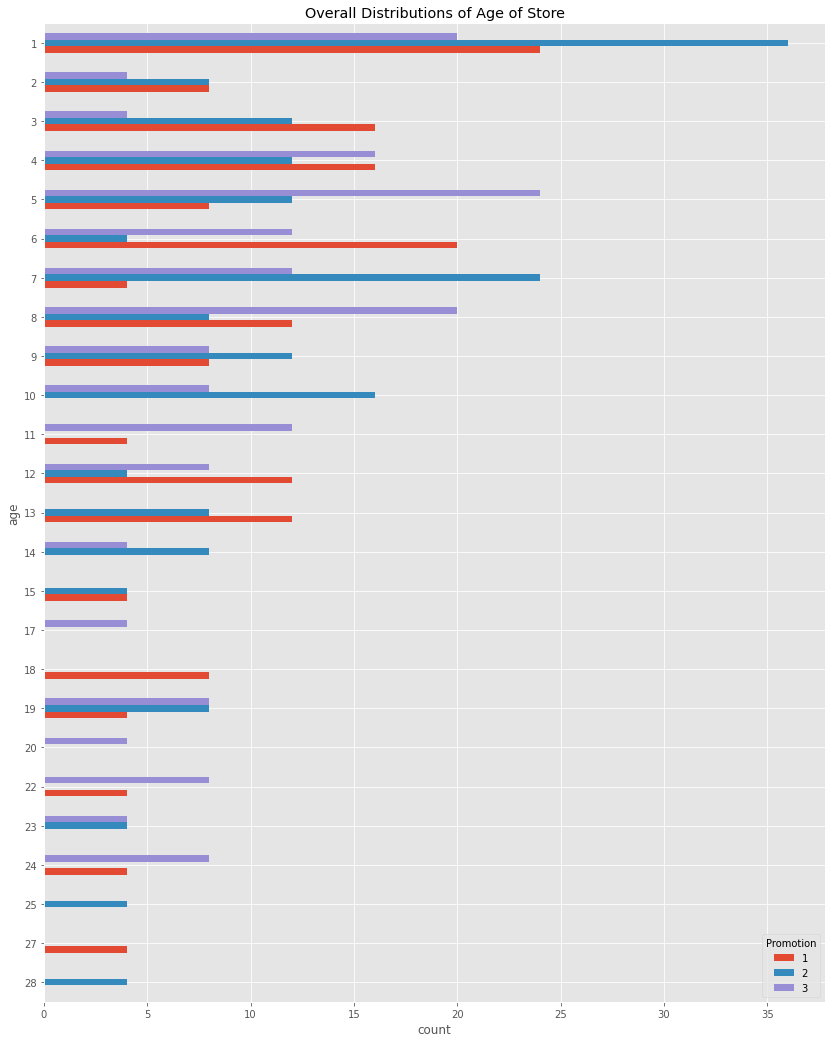

In [10]:
# Visualize this summary
ax = df.groupby(['AgeOfStore','Promotion']).count()['MarketID'].unstack('Promotion').iloc[::-1].plot(
     kind='barh',
     figsize=(14,18),
     grid=True)
ax.set_ylabel('age')
ax.set_xlabel('count')
ax.set_title('Overall Distributions of Age of Store')

plt.show()

In [11]:
df.groupby('Promotion').describe()['AgeOfStore']

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,8.279070,6.636160,1.0,3.0,6.0,12.0,27.0
2,188.0,7.978723,6.597648,1.0,3.0,7.0,10.0,28.0
3,188.0,9.234043,6.651646,1.0,5.0,8.0,12.0,24.0


## Performing A/B Testing

In [12]:
means = df.groupby('Promotion').mean()['SalesInThousands']
stds = df.groupby('Promotion').std()['SalesInThousands']
ns = df.groupby('Promotion').count()['SalesInThousands']
print(means)
print(stds)
print(ns)

Promotion
1    58.099012
2    47.329415
3    55.364468
Name: SalesInThousands, dtype: float64
Promotion
1    16.553782
2    15.108955
3    16.766231
Name: SalesInThousands, dtype: float64
Promotion
1    172
2    188
3    188
Name: SalesInThousands, dtype: int64


## Comparing Promotion 1 VS Promotion 2 in an A/B Test

In [13]:
from scipy import stats
t, p = stats.ttest_ind(df.loc[df['Promotion']== 1, 'SalesInThousands'].values,
                      df.loc[df['Promotion']== 2, 'SalesInThousands'].values,
                      equal_var = False)
print('t-value = ' + str(t))
print('p-value = ' + str(p))

t-value = 6.42752867090748
p-value = 4.2903687179871785e-10


## Analysis of P and t-values

## Comparing Promotion 1 VS Promotion 3 in an A/B Test

In [14]:
t, p = stats.ttest_ind(
     df.loc[df['Promotion']== 1, 'SalesInThousands'].values,
     df.loc[df['Promotion']== 3, 'SalesInThousands'].values,
     equal_var = False)
print('t-value = ' +str(t))
print('p-value = ' +str(p))

t-value = 1.5560224307758634
p-value = 0.12059147742229478


## Analysis of P and t-values